In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
estimate_data = pd.read_csv('train_set.csv')

In [3]:
estimate_data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [4]:
estimate_data.shape

(287836, 15)

In [5]:
estimate_data.isnull().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [6]:
estimate_data.dropna(inplace=True)

In [7]:
estimate_data.isnull().sum()

Year                  0
OGC                   0
OG                    0
DC                    0
Dept                  0
UC                    0
Union                 0
JF                    0
Job                   0
EI                    0
Salaries              0
Overtime              0
H/D                   0
YT                    0
Total_Compensation    0
dtype: int64

<AxesSubplot:>

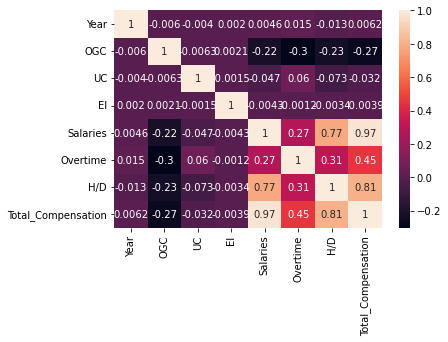

In [27]:
sns.heatmap(estimate_data.corr(),annot=True)

In [9]:
estimate_data_new = estimate_data[['Salaries','Overtime','H/D','Total_Compensation']]

In [10]:
estimate_data_new.head()

,Salaries,Overtime,H/D,Total_Compensation
0,12196,0,0.00,16158
1,74639,2820,12703.31,115784
2,100554,0,12424.50,144708
3,140164,52754,13043.87,242323
4,58813,0,7655.28,82106


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
x = estimate_data_new.iloc[:,:-1]

In [19]:
x

,Salaries,Overtime,H/D
0,12196,0,0.00
1,74639,2820,12703.31
2,100554,0,12424.50
3,140164,52754,13043.87
4,58813,0,7655.28
...,...,...,...
287831,78980,30115,13068.80
287832,30704,0,5465.57
287833,104451,0,13054.94
287834,14425,0,4051.90


In [17]:
y = estimate_data_new.iloc[:,-1]

In [18]:
y

0          16158
1         115784
2         144708
3         242323
4          82106
           ...  
287831    147079
287832     40174
287833    164669
287834     19594
287835    154197
Name: Total_Compensation, Length: 287798, dtype: int64

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(x_test)

In [24]:
mean_squared_error(y_pred,y_test)

59856956.37382936